# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari [Kaggle](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset). Dataset tersebut adalah dataset tentang stroke yang terdiri dari 5,110 data dan 12 fitur yaitu:
   - id
   - gender
   - age
   - hypertension
   - heart_disease
   - ever_married
   - work_type
   - Residence_type
   - avg_glucose_level
   - bmi
   - smoking_status
   - stroke

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [154]:
stroke_df = pd.read_csv('healthcare-dataset-stroke-data.csv')
stroke_df.shape

(5110, 12)

In [155]:
stroke_df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [156]:
#Informasi tentang dataset
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Terdapat 5110 row data dan 12 fitur. Ada 5 fitur dengan tipe data string, 4 fitur dengan tipe data integer, dan 3 fitur dengan tipe data float (dengan kata lain terdapat 5 tipe data kategorikal dan 7 tipe data numerikal).


In [157]:
#Informasi statistik deskriptif dari dataset
stroke_df.describe(include='all')

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,4909.000000,5110,5110.000000
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,36517.829354,NaN,43.226614,0.097456,0.054012,NaN,NaN,NaN,106.147677,28.893237,NaN,0.048728
std,21161.721625,NaN,22.612647,0.296607,0.226063,NaN,NaN,NaN,45.283560,7.854067,NaN,0.215320
min,67.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,17741.250000,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.245000,23.500000,NaN,0.000000
50%,36932.000000,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.885000,28.100000,NaN,0.000000
75%,54682.000000,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,33.100000,NaN,0.000000


In [158]:
stroke_df.groupby("stroke").agg({
    "age": "mean",
    "hypertension": "mean",
    "heart_disease": "mean",
    "avg_glucose_level": "mean",
    "bmi": "mean"
})

,age,hypertension,heart_disease,avg_glucose_level,bmi
stroke,,,,,
0,41.971545,0.088871,0.047110,104.795513,28.823064
1,67.728193,0.265060,0.188755,132.544739,30.471292


Dari analisis statistik deskriptif diatas dapat dilihat bahwa:
- Kebanyakan data berasal dari wanita.
- Dataset berasal dari mayoritas orang yang sudah menikah dan memiliki pekerjaan privat.
- Mayoritas orang tidak merokok.
- Rata-rata rentang usia yang terkena stroke berkisar pada usia 60an tahun.
- Memiliki hipertensi kemungkinan besar terkena stroke dan memiliki masalah jantung.

In [159]:
#Cek duplikat
stroke_df.duplicated().sum()

np.int64(0)

In [160]:
#Cek missing value
stroke_df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [161]:
#Cek data imbalance
stroke_df['stroke'].value_counts()

,count
stroke,
0,4861
1,249


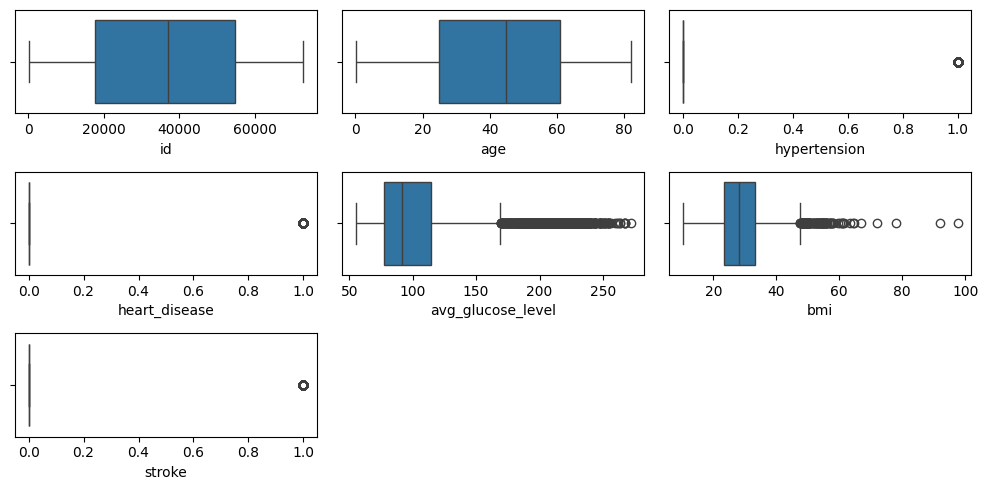

In [162]:
#Cek outlier
num_cols = stroke_df.select_dtypes(include=np.number).columns
fig = plt.figure(figsize=(10, 5))
for i, col in enumerate(num_cols):
    ax = fig.add_subplot(3, 3, i+1)
    sns.boxplot(x=stroke_df[col])
plt.tight_layout()
plt.show()



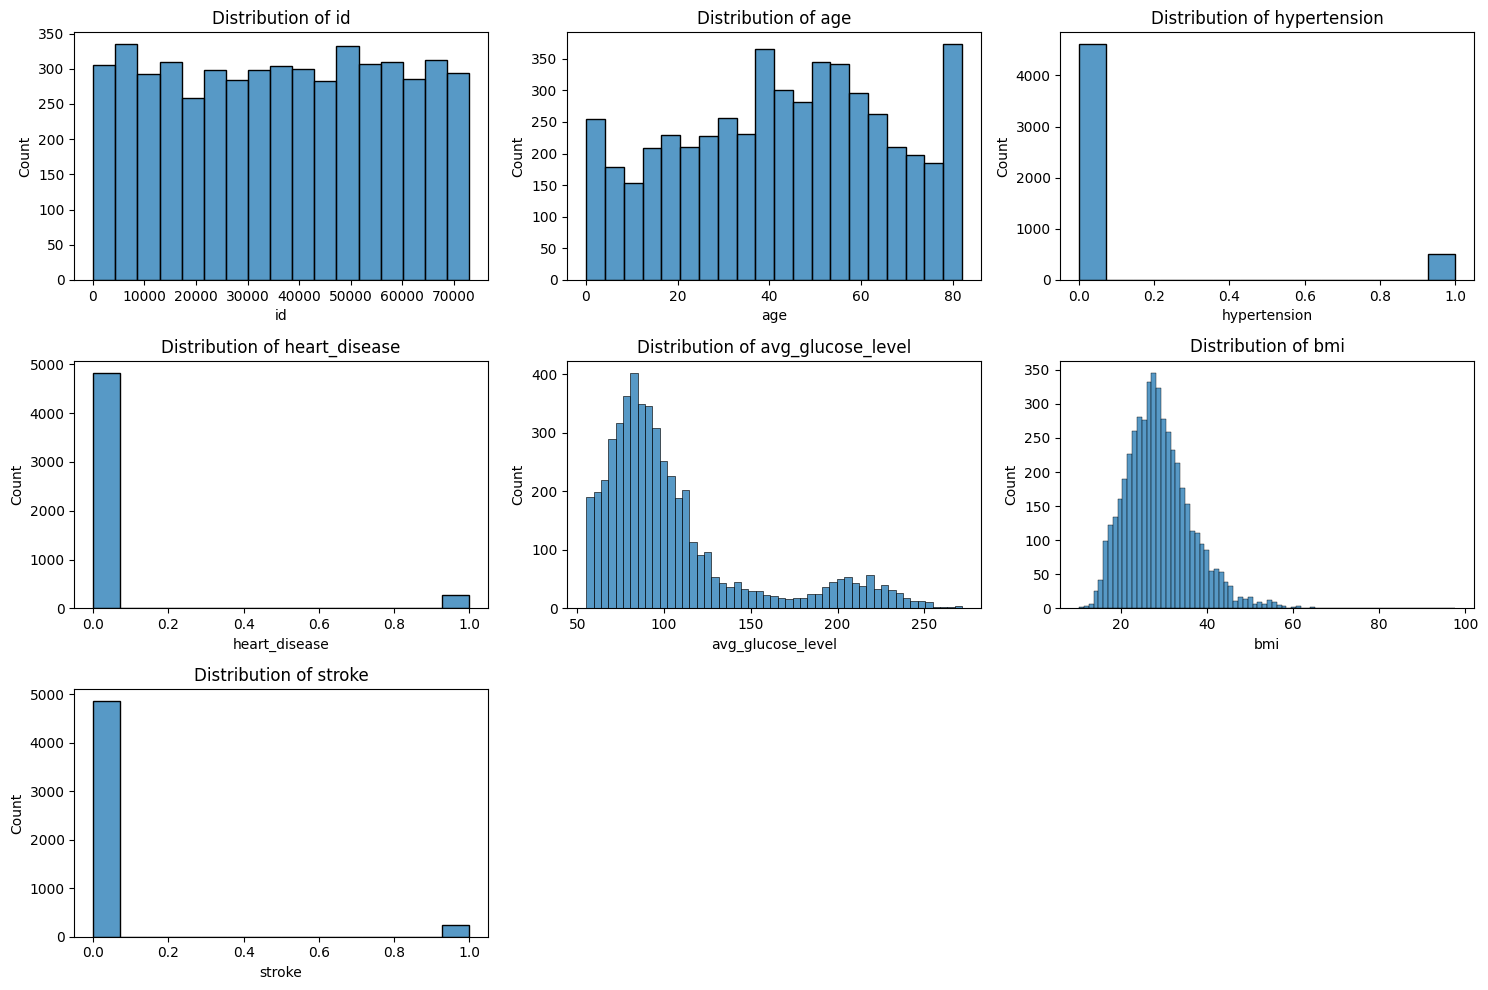

In [163]:
#Cek distribusi numerik
num_cols = stroke_df.select_dtypes(include=np.number).columns
fig = plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    ax = fig.add_subplot(3, 3, i+1)
    sns.histplot(x=stroke_df[col])
    ax.set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

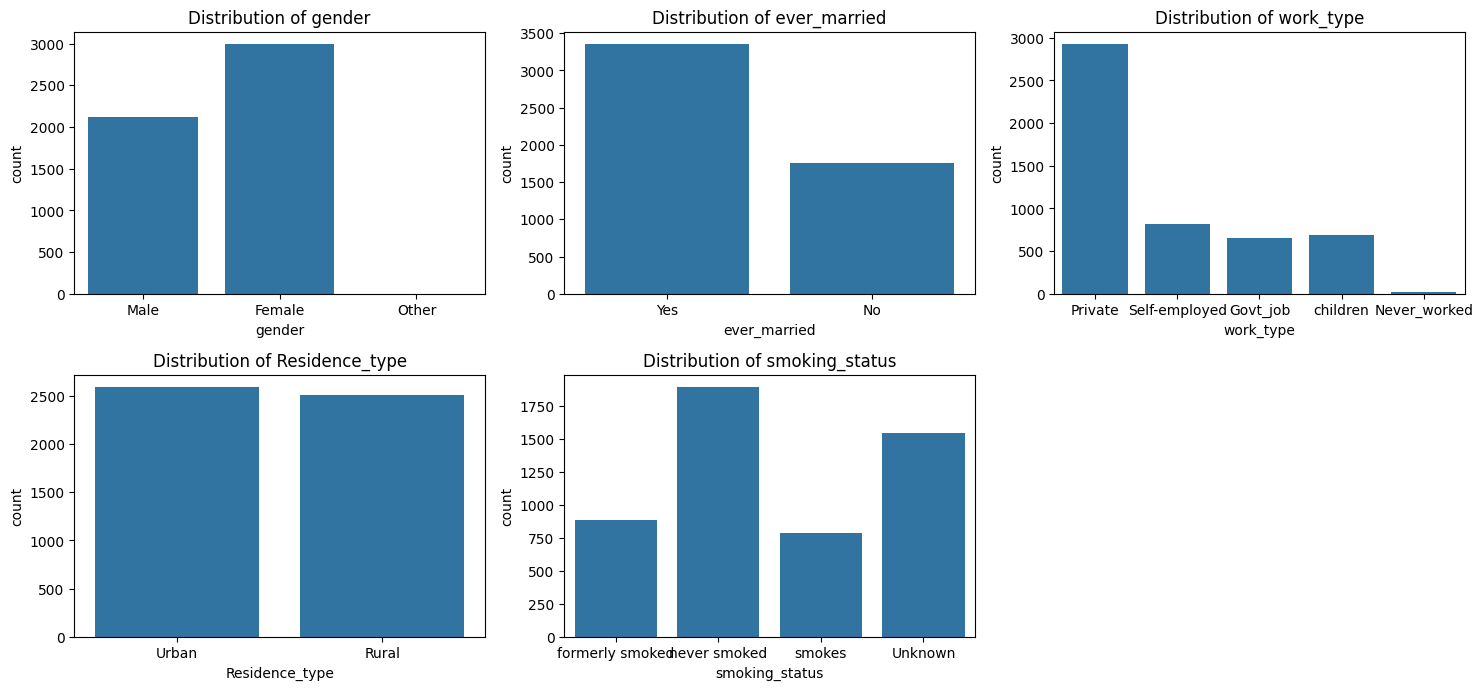

In [164]:
#Cek distribusi kategorikal
cat_cols = stroke_df.select_dtypes(include='object').columns
fig = plt.figure(figsize=(15, 10))
for i, col in enumerate(cat_cols):
    ax = fig.add_subplot(3, 3, i+1)
    sns.countplot(x=stroke_df[col])
    ax.set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

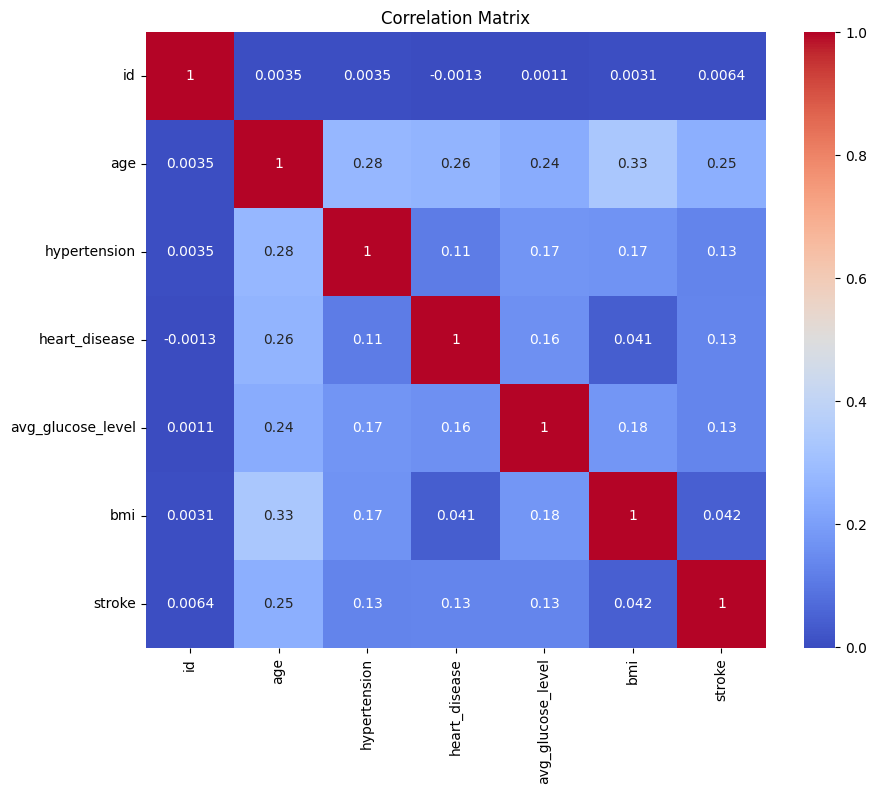

In [165]:
#Matriks korelasi (numerik)
plt.figure(figsize=(10, 8))
sns.heatmap(stroke_df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

- Terdapat beberapa missing values pada data, berarti harus diputuskan untuk diisi/dihapus.
- Terdapat class imbalance pada yang kena stroke dan tidak, berarti diperlukan undersampling/oversampling.
- Terdapat banyak outlier pada bmi dan kadar glukosa, berarti harus diputuskan untuk dihapus/discaling/tetap disimpan.
- Age dan hypertension memiliki korelasi yang erat dengan stroke.

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [166]:
#Hapus missing value
stroke_df = stroke_df.dropna()
stroke_df.isna().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0


In [167]:
#Hapus data duplikat
stroke_df = stroke_df.drop_duplicates()
stroke_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [168]:
#Outlier akan dihapus untuk bmi dan kadar glukosa saja, karena korelasinya tidak terlalu tinggi pada target class
#Remove outliers with IQR
outlier_cols = ['bmi', 'avg_glucose_level']
Q1 = stroke_df[outlier_cols].quantile(0.25)
Q3 = stroke_df[outlier_cols].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

for col in outlier_cols:
    stroke_df = stroke_df[(stroke_df[col] >= lower_bound[col]) & (stroke_df[col] <= upper_bound[col])]

stroke_df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4260.000000,4260.000000,4260.000000,4260.000000,4260.000000,4260.000000,4260.000000
mean,37137.446009,40.593070,0.068545,0.036385,91.515812,27.813028,0.031925
std,20977.617304,22.443644,0.252708,0.187268,22.715044,6.721922,0.175821
min,77.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,18683.000000,22.000000,0.000000,0.000000,75.060000,23.000000,0.000000
50%,37645.500000,41.000000,0.000000,0.000000,88.055000,27.400000,0.000000
75%,55377.750000,58.000000,0.000000,0.000000,104.055000,32.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,168.150000,47.500000,1.000000


In [169]:
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4260 entries, 2 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4260 non-null   int64  
 1   gender             4260 non-null   object 
 2   age                4260 non-null   float64
 3   hypertension       4260 non-null   int64  
 4   heart_disease      4260 non-null   int64  
 5   ever_married       4260 non-null   object 
 6   work_type          4260 non-null   object 
 7   Residence_type     4260 non-null   object 
 8   avg_glucose_level  4260 non-null   float64
 9   bmi                4260 non-null   float64
 10  smoking_status     4260 non-null   object 
 11  stroke             4260 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 432.7+ KB


In [170]:
#Encoding fitur kategorikal
stroke_df['gender'] = stroke_df['gender'].map({'Male': 0, 'Female': 1, 'Other': 2})
stroke_df['ever_married'] = stroke_df['ever_married'].map({'No': 0, 'Yes': 1})
stroke_df['work_type'] = stroke_df['work_type'].map({'Private': 0, 'Self-employed': 1, 'Govt_job': 2, "children": 3, "Never_worked": 4})
stroke_df['Residence_type'] = stroke_df['Residence_type'].map({'Urban': 0, 'Rural': 1})
stroke_df['smoking_status'] = stroke_df['smoking_status'].map({'never smoked': 0, 'Unknown': 1, 'formerly smoked': 2, 'smokes': 3})
stroke_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,31112,0,80.0,0,1,1,0,1,105.92,32.5,0,1
6,53882,0,74.0,1,1,1,0,1,70.09,27.4,0,1
7,10434,1,69.0,0,0,0,0,0,94.39,22.8,0,1
9,60491,1,78.0,0,0,1,0,0,58.57,24.2,1,1
10,12109,1,81.0,1,0,1,0,1,80.43,29.7,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,1,13.0,0,0,0,3,1,103.08,18.6,1,0
5106,44873,1,81.0,0,0,1,1,0,125.20,40.0,0,0
5107,19723,1,35.0,0,0,1,1,1,82.99,30.6,0,0
5108,37544,0,51.0,0,0,1,0,1,166.29,25.6,2,0


In [171]:
#Drop id karena tidak diperlukan
stroke_df = stroke_df.drop('id', axis=1)
stroke_df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,0,80.0,0,1,1,0,1,105.92,32.5,0,1
6,0,74.0,1,1,1,0,1,70.09,27.4,0,1
7,1,69.0,0,0,0,0,0,94.39,22.8,0,1
9,1,78.0,0,0,1,0,0,58.57,24.2,1,1
10,1,81.0,1,0,1,0,1,80.43,29.7,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,1,13.0,0,0,0,3,1,103.08,18.6,1,0
5106,1,81.0,0,0,1,1,0,125.20,40.0,0,0
5107,1,35.0,0,0,1,1,1,82.99,30.6,0,0
5108,0,51.0,0,0,1,0,1,166.29,25.6,2,0


In [172]:
#Shuffle data
stroke_df = stroke_df.sample(frac=1).reset_index(drop=True)
stroke_df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,59.00,1,1,1,2,1,81.51,32.6,0,0
1,0,61.00,0,0,1,0,0,99.16,26.6,3,0
2,1,22.00,0,0,0,0,0,73.50,41.3,3,0
3,0,0.88,0,0,0,3,0,112.19,18.9,1,0
4,1,27.00,0,0,0,0,0,82.05,21.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4255,1,61.00,0,0,1,0,1,79.89,24.5,3,0
4256,0,72.00,0,1,1,1,0,85.82,25.0,2,0
4257,1,34.00,0,0,1,0,0,83.07,28.0,2,0
4258,1,47.00,0,0,1,0,0,157.01,26.1,3,0


In [173]:
#Pisah target class
X = stroke_df.drop('stroke', axis=1)
y = stroke_df['stroke']

In [174]:
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0,59.00,1,1,1,2,1,81.51,32.6,0
1,0,61.00,0,0,1,0,0,99.16,26.6,3
2,1,22.00,0,0,0,0,0,73.50,41.3,3
3,0,0.88,0,0,0,3,0,112.19,18.9,1
4,1,27.00,0,0,0,0,0,82.05,21.0,1
...,...,...,...,...,...,...,...,...,...,...
4255,1,61.00,0,0,1,0,1,79.89,24.5,3
4256,0,72.00,0,1,1,1,0,85.82,25.0,2
4257,1,34.00,0,0,1,0,0,83.07,28.0,2
4258,1,47.00,0,0,1,0,0,157.01,26.1,3


In [175]:
#Normalisasi kolom X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,-1.209898,0.820236,3.686332,5.146248,0.781400,0.961525,1.014185,-0.440544,0.712227,-1.029383
1,-1.209898,0.909359,-0.271272,-0.194316,0.781400,-0.762058,-0.986013,0.336565,-0.180480,1.809529
2,0.824909,-0.828531,-0.271272,-0.194316,-1.279754,-0.762058,-0.986013,-0.793216,2.006651,1.809529
3,-1.209898,-1.769665,-0.271272,-0.194316,-1.279754,1.823316,-0.986013,0.910261,-1.326120,-0.083079
4,0.824909,-0.605725,-0.271272,-0.194316,-1.279754,-0.762058,-0.986013,-0.416769,-1.013673,-0.083079
...,...,...,...,...,...,...,...,...,...,...
4255,0.824909,0.909359,-0.271272,-0.194316,0.781400,-0.762058,1.014185,-0.511871,-0.492927,1.809529
4256,-1.209898,1.399533,-0.271272,5.146248,0.781400,0.099733,-0.986013,-0.250780,-0.418535,0.863225
4257,0.824909,-0.293796,-0.271272,-0.194316,0.781400,-0.762058,-0.986013,-0.371859,0.027818,0.863225
4258,0.824909,0.285501,-0.271272,-0.194316,0.781400,-0.762058,-0.986013,2.883634,-0.254872,1.809529


In [176]:
#Split data: test & train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Data Train: ", X_train.shape)
print("Data Test: ", X_test.shape)

Data Train:  (3408, 10)
Data Test:  (852, 10)


### **Simpan Hasil**

In [177]:
data_train = pd.concat([X_train, y_train], axis=1)
data_test = pd.concat([X_test, y_test], axis=1)

In [178]:
data_train.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3135,-1.209898,0.062695,-0.271272,-0.194316,0.7814,-0.762058,1.014185,2.376862,0.593199,0.863225,0
1200,-1.209898,0.196378,-0.271272,-0.194316,0.7814,-0.762058,1.014185,0.180703,0.250995,1.809529,0
6,0.824909,-0.472041,-0.271272,-0.194316,0.7814,0.961525,-0.986013,0.983349,0.920525,-1.029383,0
3729,0.824909,0.998481,-0.271272,-0.194316,0.7814,-0.762058,-0.986013,-0.315503,1.545420,-1.029383,0
439,-1.209898,1.444094,3.686332,-0.194316,0.7814,-0.762058,-0.986013,-0.139827,-0.046574,-1.029383,0


In [179]:
data_test.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3228,0.824909,1.800584,-0.271272,-0.194316,0.7814,0.099733,1.014185,-0.421172,-1.623689,-1.029383,1
1886,-1.209898,0.820236,-0.271272,-0.194316,0.7814,0.961525,-0.986013,0.428145,-0.195358,-1.029383,0
1780,0.824909,0.552869,-0.271272,-0.194316,0.7814,0.099733,-0.986013,-1.221176,-0.284629,-1.029383,0
1650,0.824909,1.132165,-0.271272,-0.194316,0.7814,0.099733,1.014185,-0.732456,0.712227,-1.029383,0
3200,-1.209898,0.374623,-0.271272,-0.194316,0.7814,-0.762058,-0.986013,0.501673,-0.463170,-0.083079,0


In [180]:
#Save CSV
data_train.to_csv('data_train.csv', index=False)
data_test.to_csv('data_test.csv', index=False)